In [9]:
#Representación TF-IDF y asignación de clases

import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


def clean_text(archivo):
    with open(archivo, 'r') as file:
        text = file.read().splitlines()
        file.close()
    lineas1 = [w.lower() for w in text]# convertir a minúsculas
    lineas2=[w.replace('-', ' ') for w in lineas1]
    lineas=[w.replace('/', ' ') for w in lineas2]
    re_punt = re.compile('[¿%s]' % re.escape(string.punctuation))# prepare a regex para el filtrado de caracteres
    texto = [re_punt.sub('', w) for w in lineas]# eliminar la puntuación de cada palabra
    return texto

#Limpiar pregunta
def clean(entrada):
    lineas1 = [w.lower() for w in entrada.splitlines()]# convertir a minúsculas
    #lineas2=[w.replace('-', ' ') for w in lineas1]
    #lineas=[w.replace('/', ' ') for w in lineas2]
    re_punt = re.compile('[¡¿%s]' % re.escape(string.punctuation))# prepare a regex para el filtrado de caracteres
    texto = [re_punt.sub('', w) for w in lineas1]# eliminar la puntuación de cada palabra
    return texto

def open_text(archivo):
    with open(archivo, 'r') as file:
        text = file.read().splitlines()
        file.close()
    return text

def salida_chat(entrada, archivo):
    pregunta=str(clean(entrada))
    salir=False
    for j in range(0,len(archivo)):
        var=pregunta.find(archivo[j])
        if var!= -1:
            salir = True
            break
    return salir

#Bag of words
text_preguntas = clean_text('Preguntas.txt')
vectorizer_preguntas = TfidfVectorizer(ngram_range=(1,1))
XP = vectorizer_preguntas.fit_transform(text_preguntas)#codificar como vector
YP = vectorizer_preguntas.get_feature_names()
matriz_preguntas = pd.DataFrame(XP.toarray(), columns=YP)

#Archivo con los términos donde se cierra el chat
arch_sal_chat=clean_text('Salir_Chat.txt')

#clases
Y1=[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,
6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,
12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,
16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,
19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,
23,23,23,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,27,27,27,27,27,27,27,27,27,27,27,27,27,27,
27,27,27,27,27,27,27,27,27,27,27,27,27,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,29,29,29,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,31,31,31,31,31,
31,31,31,31,31,31,31,32,32,32,32,32,32,32,32,32,32,33,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,35,35,35,35,35,36,36,36,36,36,36,36,36,36,36,
37,37,37,37,37,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,39,39,39,39,39,39,40,40,40,40,40,40,40]

#mapeo de las respuestas
DB=np.insert(XP.toarray(), XP.shape[1], np.array((Y1)), 1) 

num_col=len(YP)
print(DB.shape)
print (num_col)
#print(DB)

(575, 522)
521


In [10]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from scipy.spatial import distance
import time


def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

#cargamos la bd de entrenamiento
X = DB[:,0:num_col]
Y = DB[:,num_col]

print (np.shape(X))
#print (np.shape(Y))
#print(Y)

(575, 521)


In [11]:
#Validación del modelo

tiempo_i = time.time()

clf = linear_model.LogisticRegression(C=100,solver='liblinear',multi_class='auto')#el error disminuye con estos parámetros

#Implemetamos la metodología de validación cross validation
N = np.size(X,0)
Errores = np.ones(N)
pred = np.ones(N)
test = np.ones(N)

j = 0
kf = KFold(n_splits=N)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Entrenar el modelo.
    model = clf.fit(X_train, y_train)
    
    # Validación del modelo
    ypred = model.predict(X_test)
        
    Errores[j] = classification_error(ypred, y_test)
    
    pred[j] = ypred
    test [j] = y_test
    print(test_index)
    print("prediccion- ", ypred, "real- ", y_test )
    j+=1

print ("Matriz de Confusion: ")
print(confusion_matrix(test, pred))



print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print("\nEficiencia: " + str(1-np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print (("\nTiempo total de ejecución: " + str(time.time()-tiempo_i)) + " segundos.\n")



[0]
prediccion-  [0.] real-  [0.]
[1]
prediccion-  [0.] real-  [0.]
[2]
prediccion-  [0.] real-  [0.]
[3]
prediccion-  [0.] real-  [0.]
[4]
prediccion-  [0.] real-  [0.]
[5]
prediccion-  [0.] real-  [0.]
[6]
prediccion-  [0.] real-  [0.]
[7]
prediccion-  [0.] real-  [0.]
[8]
prediccion-  [0.] real-  [0.]
[9]
prediccion-  [0.] real-  [0.]
[10]
prediccion-  [1.] real-  [1.]
[11]
prediccion-  [1.] real-  [1.]
[12]
prediccion-  [1.] real-  [1.]
[13]
prediccion-  [1.] real-  [1.]
[14]
prediccion-  [1.] real-  [1.]
[15]
prediccion-  [1.] real-  [1.]
[16]
prediccion-  [1.] real-  [1.]
[17]
prediccion-  [1.] real-  [1.]
[18]
prediccion-  [1.] real-  [1.]
[19]
prediccion-  [1.] real-  [1.]
[20]
prediccion-  [1.] real-  [1.]
[21]
prediccion-  [1.] real-  [1.]
[22]
prediccion-  [1.] real-  [1.]
[23]
prediccion-  [1.] real-  [1.]
[24]
prediccion-  [1.] real-  [1.]
[25]
prediccion-  [2.] real-  [2.]
[26]
prediccion-  [2.] real-  [2.]
[27]
prediccion-  [2.] real-  [2.]
[28]
prediccion-  [2.] real-  

[225]
prediccion-  [17.] real-  [17.]
[226]
prediccion-  [17.] real-  [17.]
[227]
prediccion-  [17.] real-  [17.]
[228]
prediccion-  [25.] real-  [17.]
[229]
prediccion-  [17.] real-  [17.]
[230]
prediccion-  [17.] real-  [17.]
[231]
prediccion-  [17.] real-  [17.]
[232]
prediccion-  [17.] real-  [17.]
[233]
prediccion-  [17.] real-  [17.]
[234]
prediccion-  [17.] real-  [17.]
[235]
prediccion-  [17.] real-  [17.]
[236]
prediccion-  [38.] real-  [17.]
[237]
prediccion-  [34.] real-  [17.]
[238]
prediccion-  [27.] real-  [17.]
[239]
prediccion-  [18.] real-  [18.]
[240]
prediccion-  [34.] real-  [18.]
[241]
prediccion-  [18.] real-  [18.]
[242]
prediccion-  [18.] real-  [18.]
[243]
prediccion-  [18.] real-  [18.]
[244]
prediccion-  [18.] real-  [18.]
[245]
prediccion-  [18.] real-  [18.]
[246]
prediccion-  [29.] real-  [18.]
[247]
prediccion-  [29.] real-  [18.]
[248]
prediccion-  [18.] real-  [18.]
[249]
prediccion-  [18.] real-  [18.]
[250]
prediccion-  [18.] real-  [18.]
[251]
predic

[442]
prediccion-  [30.] real-  [30.]
[443]
prediccion-  [30.] real-  [30.]
[444]
prediccion-  [30.] real-  [30.]
[445]
prediccion-  [30.] real-  [30.]
[446]
prediccion-  [30.] real-  [30.]
[447]
prediccion-  [30.] real-  [30.]
[448]
prediccion-  [30.] real-  [30.]
[449]
prediccion-  [30.] real-  [30.]
[450]
prediccion-  [30.] real-  [30.]
[451]
prediccion-  [30.] real-  [30.]
[452]
prediccion-  [30.] real-  [30.]
[453]
prediccion-  [31.] real-  [31.]
[454]
prediccion-  [31.] real-  [31.]
[455]
prediccion-  [31.] real-  [31.]
[456]
prediccion-  [31.] real-  [31.]
[457]
prediccion-  [31.] real-  [31.]
[458]
prediccion-  [31.] real-  [31.]
[459]
prediccion-  [31.] real-  [31.]
[460]
prediccion-  [31.] real-  [31.]
[461]
prediccion-  [31.] real-  [31.]
[462]
prediccion-  [31.] real-  [31.]
[463]
prediccion-  [31.] real-  [31.]
[464]
prediccion-  [18.] real-  [31.]
[465]
prediccion-  [32.] real-  [32.]
[466]
prediccion-  [32.] real-  [32.]
[467]
prediccion-  [32.] real-  [32.]
[468]
predic

In [12]:
#Para guardar el modelo (persistirlo)
from joblib import dump, load

#implementación del modelo

# Entrenar el modelo.
modelo_ent = clf.fit(X, Y)

#Precisión media del modelo
print(modelo_ent.score(X,Y))

#Guardando el modelo entrenado
dump(modelo_ent, 'TF-IDF_R.Log_Model.joblib')

1.0


['TF-IDF_R.Log_Model.joblib']

In [13]:
model = load('TF-IDF_R.Log_Model.joblib') 

# Archivo respuestas
respuestas=open_text('Respuestas.txt')

#Archivo StopList
stopwords=open_text('Stop_List.txt')
cv=TfidfVectorizer(stop_words=stopwords)
vector=cv.fit_transform(text_preguntas)

# Chatbot
print('Hola soy ChatExTIO, el chatbot del Examen de Traductor e Interprete Oficial de la Universidad de Antioquia. ¡Bienvenido! ¿En qué le puedo colaborar?')

inquietud = input()

while salida_chat(inquietud,arch_sal_chat) != True:
    word_vector=cv.transform([inquietud])
    c=np.count_nonzero(word_vector.toarray())
    entrada=clean(inquietud)
    if len(str(entrada).split()) == 1:#si se ingresa una sola palabra
        if entrada[0] == "si" or entrada[0] == "sí":
            print("¿En qué puedo ayudarle?")
        elif entrada[0] == "no":
            print("¿No requiere alguna otra información?")
        elif (entrada[0] == "excelente") or (entrada[0] == "teléfono") or (entrada[0] == "email") or (entrada[0] == "comprendo") or (entrada[0] == "saludo") or (entrada[0] == "hola") or (entrada[0] == "saludos") or (entrada[0] == "buenas") or (entrada[0] == "listo") or (entrada[0] == "llamaré") or (entrada[0] == "genial") or (entrada[0] == "ok") or (entrada[0] == "buenísimo") or (entrada[0] == "perfecto") or (entrada[0] == "super") or (entrada[0] == "entiendo") or (entrada[0] == "bien") or (entrada[0] == "entendido") or (entrada[0] == "mmm") or (entrada[0] == "emm")  or (entrada[0] == "eh") or (entrada[0] == "aja") or (entrada[0] == "exacto") or (entrada[0] == "jumm") or (entrada[0] == "umm") or (entrada[0] == "jeje") or (entrada[0] == "jajaja") or (entrada[0] == "claro") or (entrada[0] == "bueno") or (entrada[0] == "gracias") or (entrada[0] == "correcto"):
            pregunta = vectorizer_preguntas.transform([inquietud])
            pred=model.predict(pregunta.toarray())
            aux_pos=(int(pred.item()))
            respuesta_p = respuestas[aux_pos]
            print(respuesta_p)       
        elif c == 1:
            print("No comprendo su pregunta, por favor sea más claro")
        else:
            print("No puedo responder a este tipo de inquietudes, pero puedo ayudarle con todo lo relacionado con el examen de traductor"
                 "e intérprete oficial, ¿Hay algo en lo que pueda ayudarle?")
                
    else:
        if (entrada[0] == "de acuerdo") or (entrada[0] == "por supuesto") or (entrada[0] == "muy bien") or (entrada[0] == "está bien") or (entrada[0] == "es claro") or (entrada[0] == "me comunicaré") or (entrada[0] == "que bien") or (entrada[0] == "le agradezco") or (entrada[0] == "muchas gracias") or (entrada[0] == "muy gentil") or (c>1):
            pregunta = vectorizer_preguntas.transform([inquietud])
            pred=model.predict(pregunta.toarray())
            aux_pos=(int(pred.item()))
            respuesta_p = respuestas[aux_pos]
            print(respuesta_p)   
    
        elif c == 1:#se valida si al aplicar stop words se queda con una sola palabra
                print("No comprendo su pregunta, por favor sea más claro")
        
        else:
            print("No puedo responder a este tipo de inquietudes, pero puedo ayudarle con todo lo relacionado con el examen de traductor"
                 "e intérprete oficial, ¿Hay algo en lo que pueda ayudarle?")
        
    inquietud = input()
    
("Hasta pronto. Vuelva y cualquier inquietud con gusto será atendida."" Para peticiones, quejas, reclamos y sugerencias por favor comunicarse a la Escuela de Idiomas. Prof. Gabriel Quiroz, teléfono (57)(4) 219 8997 o escribir al correo electrónico: examentraductorinterpreteoficial@udea.edu.co")
 

Hola soy ChatExTIO, el chatbot del Examen de Traductor e Interprete Oficial de la Universidad de Antioquia. ¡Bienvenido! ¿En qué le puedo colaborar?
es todo


'Hasta pronto. Vuelva y cualquier inquietud con gusto será atendida. Para peticiones, quejas, reclamos y sugerencias por favor comunicarse a la Escuela de Idiomas. Prof. Gabriel Quiroz, teléfono (57)(4) 219 8997 o escribir al correo electrónico: examentraductorinterpreteoficial@udea.edu.co'

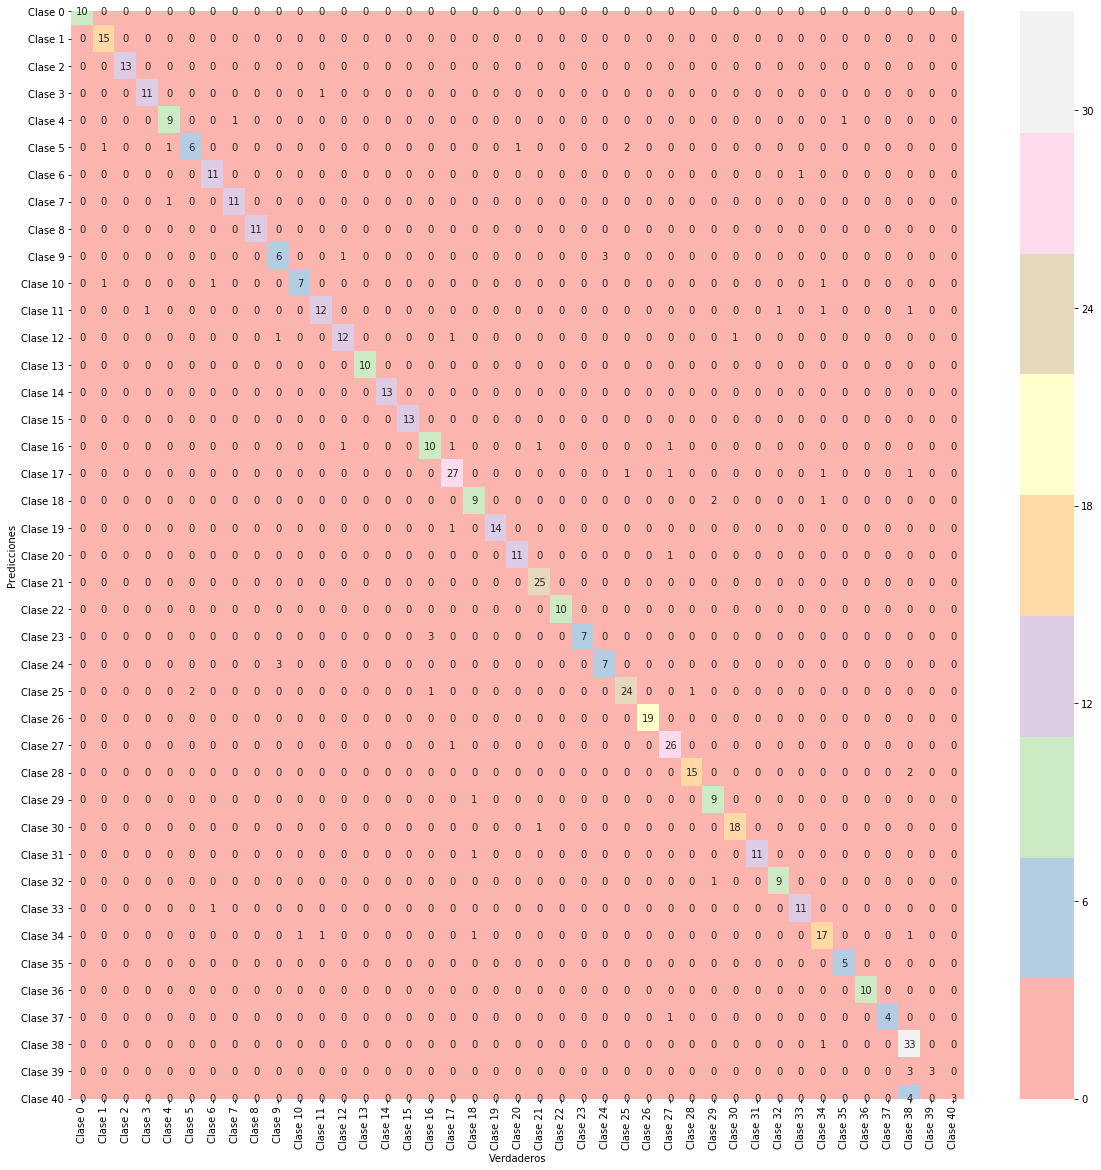

In [16]:
#Matriz de confusión

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]

conf=confusion_matrix(test, pred)

columnas=['Clase %s'%(i) for i in (num) [0:len(np.unique(pred))]]
df_cm=pd.DataFrame(conf,index=columnas, columns=columnas)

fig, ax = plt.subplots(figsize=(20,20))

ax=sns.heatmap(df_cm,cmap='Pastel1', annot=True)

ax.set(xlabel='Verdaderos', ylabel='Predicciones')

plt.show()